# PyData Carolinas 2016

R notebook, example building a model that can be used by a Flask web application

In [1]:
library(RCurl)

x <- getURL("https://raw.githubusercontent.com/softporcupine/pandas-matplotlib-example/master/home_data.csv")
home_data <- read.csv(text = x)
str(home_data)

Loading required package: bitops


'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : int  221900 538000 180000 604000 510000 1225000 257500 291850 229500 323000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1

# Our target: price
Let's first look at the distribution of price before we look at features

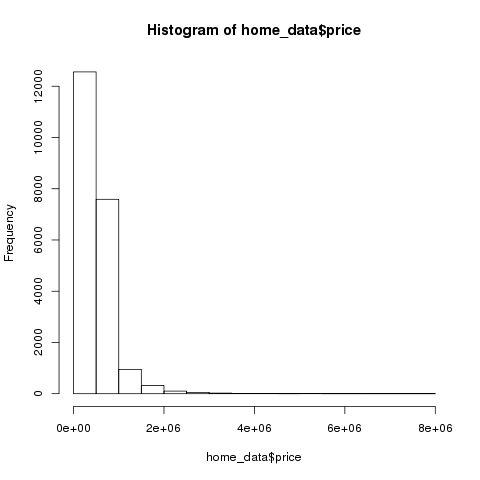

In [2]:
hist(home_data$price)

# Features

Some features are really indicators (like waterfront) and most are not continuous, but can be used as such. Afterall, you can have 2.5 baths or 1.5 floors...

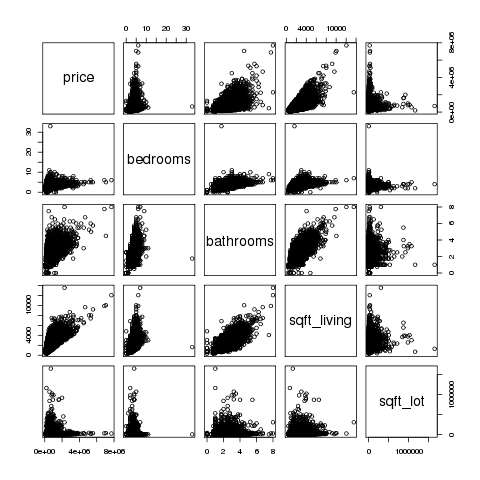

In [4]:
pairs(home_data[3:7])

In [6]:
# let's go with sqft_living for this model
with(home_data, cor(price, sqft_living))^2

[1] 0.4928532

# Model

Simple linear regression.

In [7]:
lm.out = lm(price ~ sqft_living, data=home_data)

In [8]:
anova(lm.out)

Analysis of Variance Table

Response: price
               Df     Sum Sq    Mean Sq F value    Pr(>F)    
sqft_living     1 1.4356e+15 1.4356e+15   21002 < 2.2e-16 ***
Residuals   21611 1.4773e+15 6.8358e+10                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Just like with our simple model in Python, we need to define a function that is self contained

In [9]:
lm.out$coef

(Intercept) sqft_living 
-43580.7403    280.6236 

In [10]:
base_estimator <- function(sqft) {
    price_est = -43580.7403 + 280.6236 * sqft
    return(price_est)
}

Now we'll copy and paste the above estimator in our quick and dirty R to Python notebook